In [80]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [81]:
NEURAL_NETWORKS = ['DenseNet201', 'MobileNetV2', 'InceptionV3']
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [82]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [83]:
#main_pd

In [84]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

86.37057840824127

In [85]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [86]:
def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).
    """
    plt.figure(figsize=figsize)

    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        plt.plot(x, y, marker='o', linestyle='-', label=network)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(attribute.replace('_', ' ').capitalize())
    plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    plt.grid(True)
    plt.legend()
    plt.show()

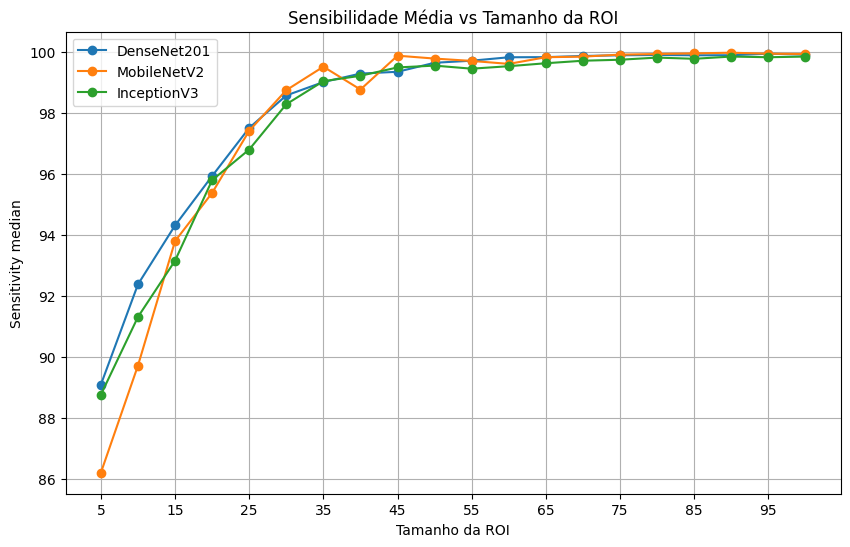

In [87]:
plot_comparison(main_pd, 'sensitivity_median', 'Sensibilidade Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)

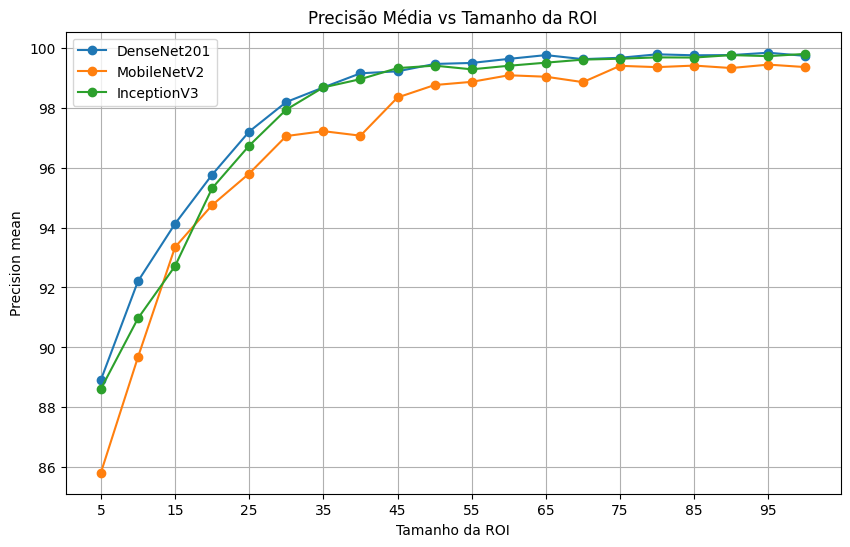

In [88]:
plot_comparison(main_pd, 'precision_mean', 'Precisão Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)

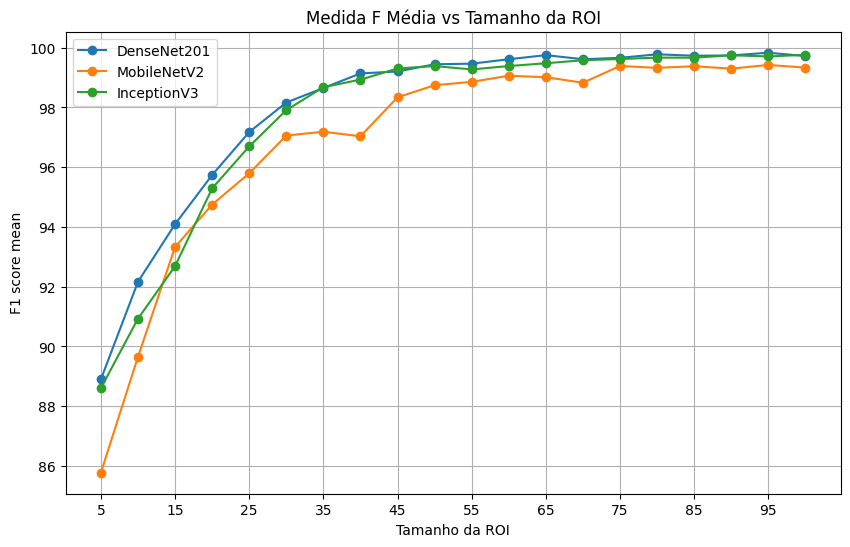

In [89]:
plot_comparison(main_pd, 'f1_score_mean', 'Medida F Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)


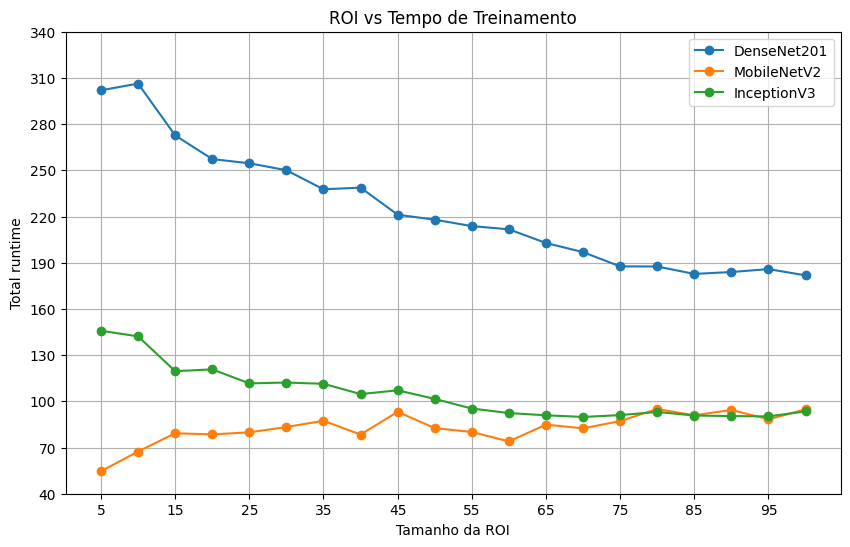

In [90]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', 'ROI vs Tempo de Treinamento', 'Tamanho da ROI', range_rois, yticks=range_time)


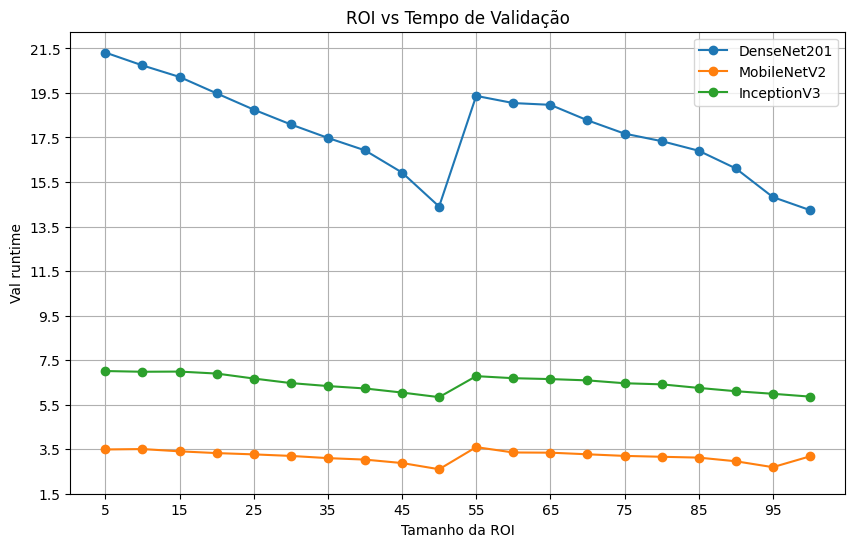

In [91]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação
range_time_validation = np.arange(1.5, 23.5, 2)

plot_comparison(main_pd, 'val_runtime', 'ROI vs Tempo de Validação', 'Tamanho da ROI', range_rois, yticks=range_time_validation)


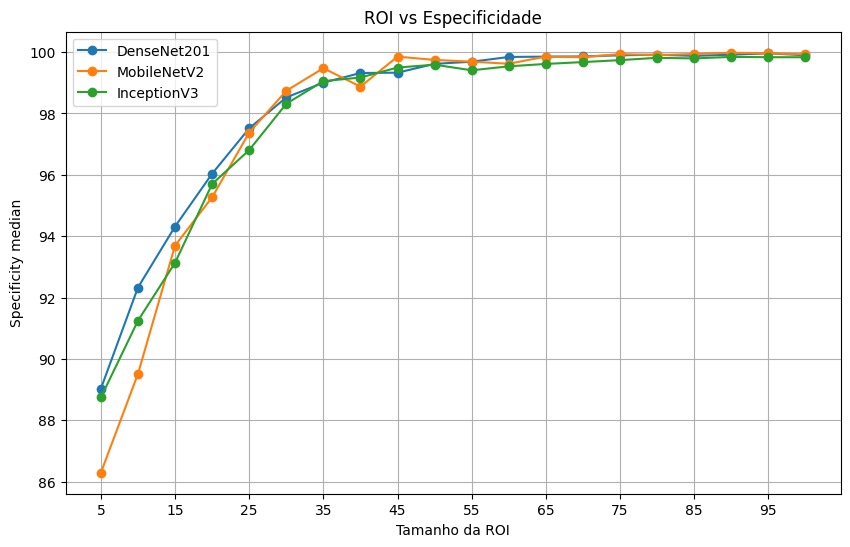

In [92]:

plot_comparison(main_pd, 'specificity_median', 'ROI vs Especificidade', 'Tamanho da ROI', range_rois)


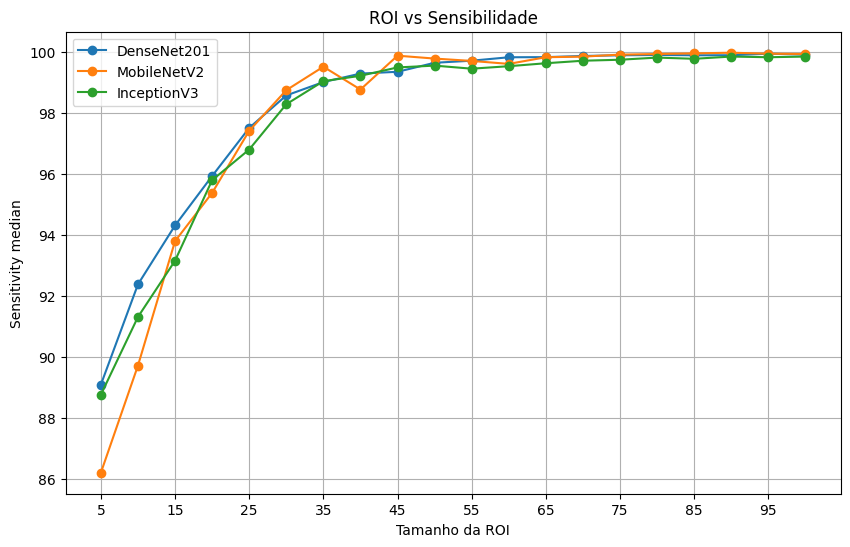

In [93]:

plot_comparison(main_pd, 'sensitivity_median', 'ROI vs Sensibilidade', 'Tamanho da ROI', range_rois)


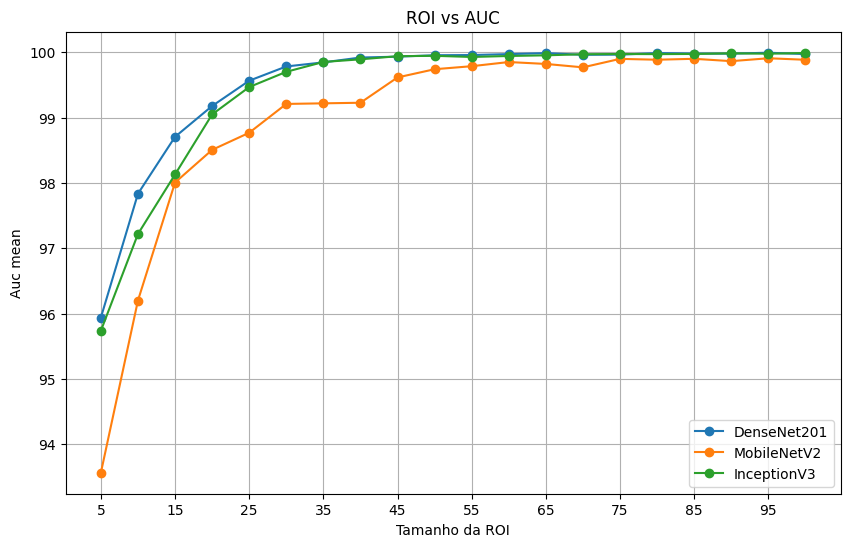

In [94]:
plot_comparison(main_pd, 'auc_mean', 'ROI vs AUC', 'Tamanho da ROI', range_rois)


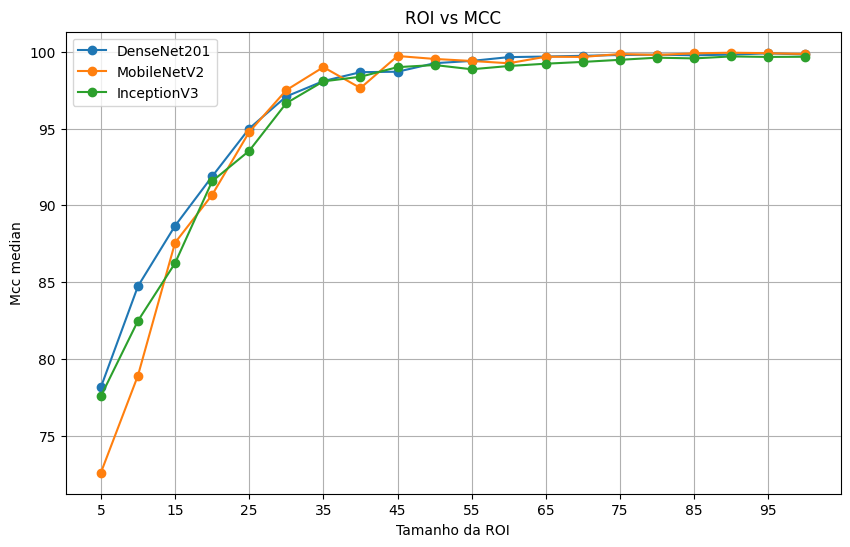

In [95]:
plot_comparison(main_pd, 'mcc_median', 'ROI vs MCC', 'Tamanho da ROI', range_rois)
